In [3]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt 
import scipy

In [4]:
def BianconiAlbertGraph(N,m,selectedNodes):
    A = np.zeros((N,N),dtype=np.int8)
    ks = np.zeros(N,dtype=np.int64)
    h = selectedNodes.shape[0]
    trajectory = np.zeros((N,h),dtype=np.int64)
    etas = np.random.uniform(0,1,N)
    n = m

    
    #initialize
    G = nx.star_graph(m-1)
    A[:m,:m] = nx.adjacency_matrix(G).todense()
    ks = np.sum(A,axis=0)
    normalizationFactor = np.sum(np.dot(ks,etas))
    

    
    for i in range(m,N):
      
        ps = ks*etas/np.sum(np.dot(ks,etas))
        targets = np.random.choice(np.arange(N),size=m,p = ps)
        #print(i,targets)


        for k in range(m):
            j = targets[k]
            A[j,i] += 1
            A[i,j] += 1
            normalizationFactor += etas[j]*ks[j]
            ks[j] += 1
      
        #update
      
        ks[i] = m
        normalizationFactor += etas[i]*m
        trajectory[i,:] = ks[selectedNodes]
        
    
    
        
    return A,etas,ks,trajectory
    

In [5]:
selectedNodes = np.random.randint(0,10000,5)
print(selectedNodes) # selected nodes to observe their growth

[8920 9803 2834 9340 7164]


In [6]:
selectedNodes = np.array([0,1,5,10,15])

In [7]:
A,etas,ks,trajectory = BianconiAlbertGraph(10000,4,selectedNodes)

In [8]:
selctedEtas = etas[selectedNodes]
selctedEtas  # etas of selected node to observe

array([0.89344667, 0.86179807, 0.52389926, 0.5459338 , 0.29291214])

In [9]:
expectedGrowthExponent = selctedEtas/1.25
expectedGrowthExponent

array([0.71475734, 0.68943845, 0.4191194 , 0.43674704, 0.23432971])

/tmp/ipykernel_21313/2243409715.py:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(10000)),np.log(trajectory[:,i]))


0.7180509957013371
0.712577031247081
0.3856302811396456
0.4964830233268897
0.08540375803972224


/tmp/ipykernel_21313/2243409715.py:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(10000)),np.log(trajectory[:,i]))


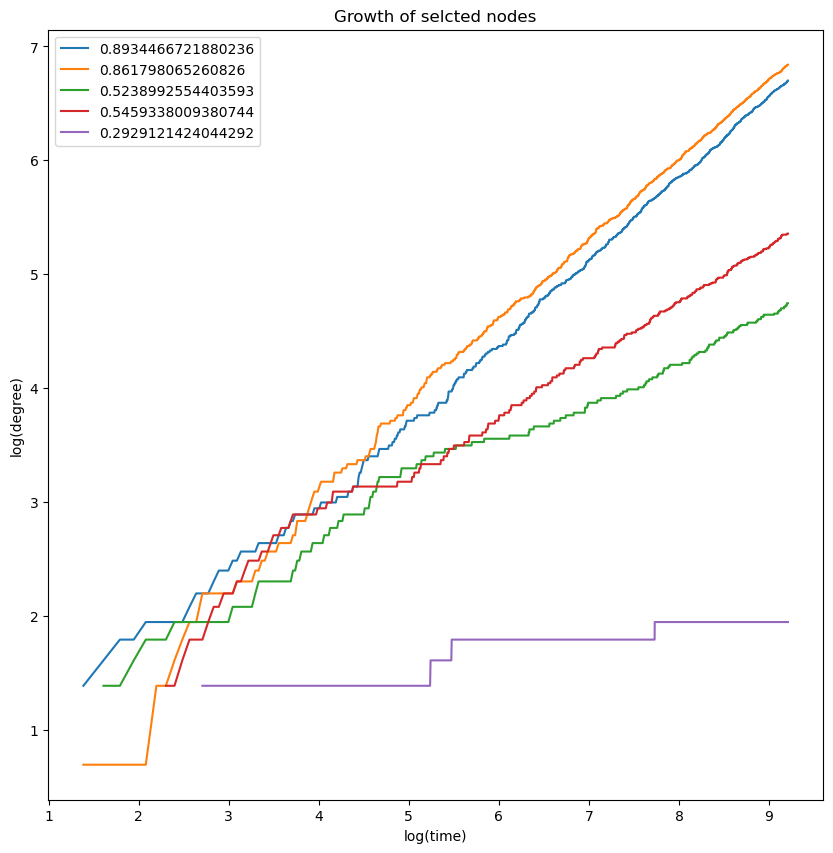

In [10]:
calculatedExponents = np.zeros(5)

plt.figure(figsize=(10,10))
plt.title("Growth of selcted nodes")
plt.xlabel("log(time)")
plt.ylabel("log(degree)")
for i in range(5):
    plt.plot(np.log(np.arange(10000)),np.log(trajectory[:,i]))
    slope0,_,_,_,_ = scipy.stats.linregress(np.log(np.arange(10000)[np.nonzero(trajectory[:,i])]),np.log(trajectory[:,i][np.nonzero(trajectory[:,i])]))
    calculatedExponents[i] = slope0
    print(slope0)
plt.legend(selctedEtas)
          

In [11]:
ErrorPersentage = 100*np.abs(calculatedExponents - expectedGrowthExponent)/expectedGrowthExponent
ErrorPersentage

array([ 0.46080785,  3.35614861,  7.99035379, 13.6774785 , 63.55402112])

## Final Degree Disturbuation

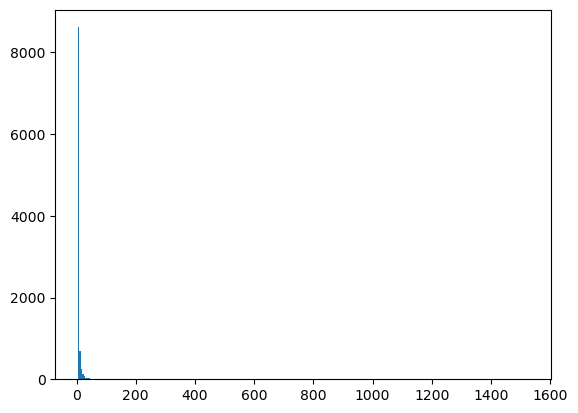

In [12]:
sortedKs = np.sort(ks)
frequencies,bins,_ = plt.hist(sortedKs,bins=300)

density = frequencies/np.sum(frequencies)

/tmp/ipykernel_21313/2625470898.py:4: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(bins[:-1]),np.log(density))


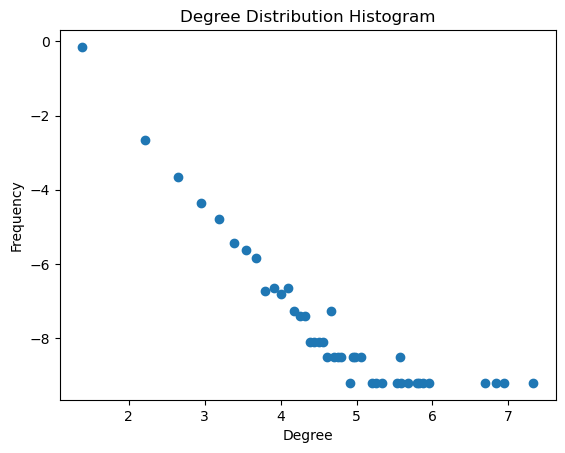

In [13]:
plt.title("Degree Distribution Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.scatter(np.log(bins[:-1]),np.log(density))

/tmp/ipykernel_21313/3465365416.py:2: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(bins[:-1][:ss]),np.log(density[:ss]))


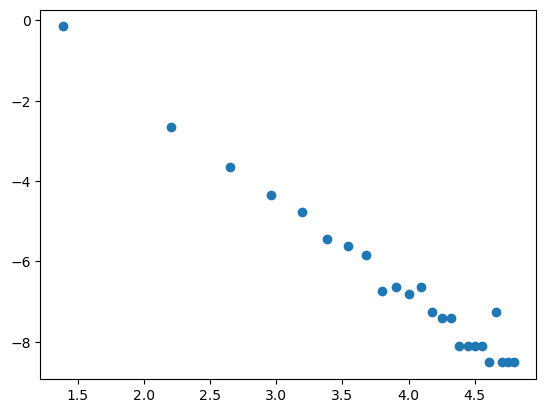

In [14]:
ss = 25
plt.scatter(np.log(bins[:-1][:ss]),np.log(density[:ss]))

In [15]:
slope0,_,_,_,_ = scipy.stats.linregress(np.log(bins[:-1][np.nonzero(density)][:ss]),np.log(density[np.nonzero(density)][:ss]))
slope0

-2.4040015904357865